# Sets

As opposed to the sequence interface which we studied in the last chapter, in sets, the order of items is interinsic. 
The items in a set have a *key* and *value* and are sorted by key. In a structure such as a Python disctionary, both key and value are present, however, in a structure like Python set, the key is the same as the item itself. 

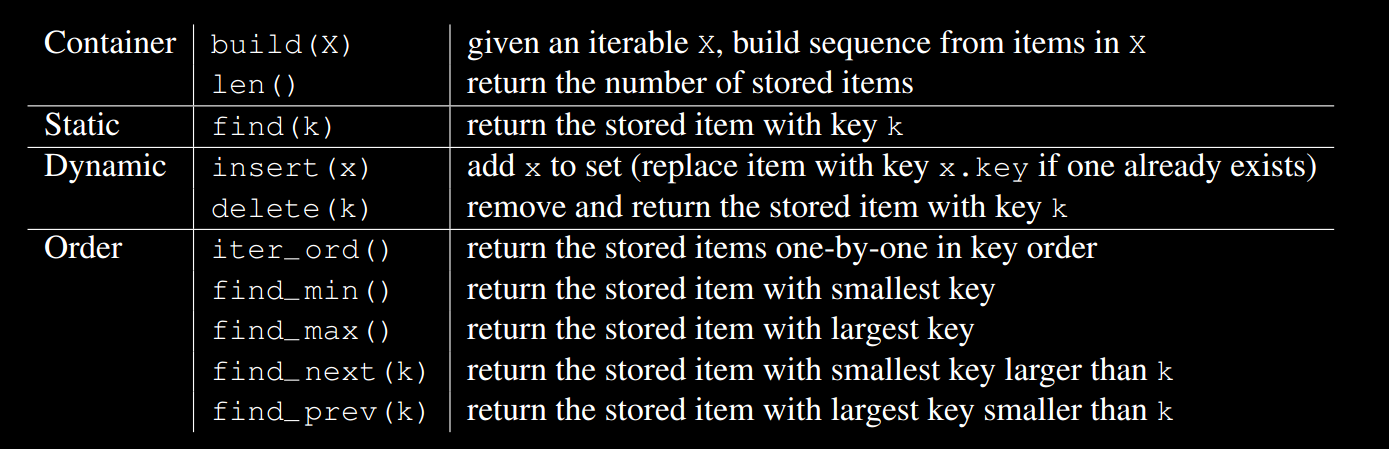


Special case interfaces: 
_Dictionary_ (or _Map_): set without the Order operations 


We will consider 3 different implementations of the set:
- Using an array
- Using a sorted array
- Using a hash table (Chapter 4)


 

## Implementation of the Set ADT using arrays
The set data structure can be obtained from the sequence DS; we only have to make sure that no item is added to a set twice. However this implementation is not efficient.

In [ ]:
def Set_from_Seq(seq):
    class set_from_seq:
        def __init__(self): 
            self.S = seq() # e.g. Dynamic_Array or Linked_List
            
        def __len__(self): 
            return len(self.S)
        
        def __iter__(self): 
            yield from self.S

        def build(self, A):
            self.S.build(A)

        def insert(self, x):
            for i in range(len(self.S)):
                if self.S.get_at(i).key == x.key:
                    self.S.set_at(i, x)
                    return
            self.S.insert_last(x)

        def delete(self, k):
            for i in range(len(self.S)):
                if self.S.get_at(i).key == k:
                    return self.S.delete_at(i)
        
        def find(self, k):
            for x in self:
                if x.key == k: 
                    return x
            return None
        
        # Defining (overloading) the `in` operator for sets
        def __contains__( self, key ):
            return find(self, key)!=None  
        
        def find_min(self):
            out = None
            for x in self:
                if (out is None) or (x.key < out.key):
                    out = x
            return out
    
        def find_max(self):
            out = None
            for x in self:
                if (out is None) or (x.key > out.key):
                    out = x
            return out
    
    
        def find_next(self, k):
            out = None
            for x in self:
                if x.key > k:
                    if (out is None) or (x.key < out.key):
                        out = x
            return out
    
        def find_prev(self, k):
            out = None
            for x in self:
                if x.key < k:
                    if (out is None) or (x.key > out.key):
                        out = x
            return out
    
        def iter_ord(self):
            x = self.find_min()
            while x:
                yield x
                x = self.find_next(x.key)
        return set_from_seq

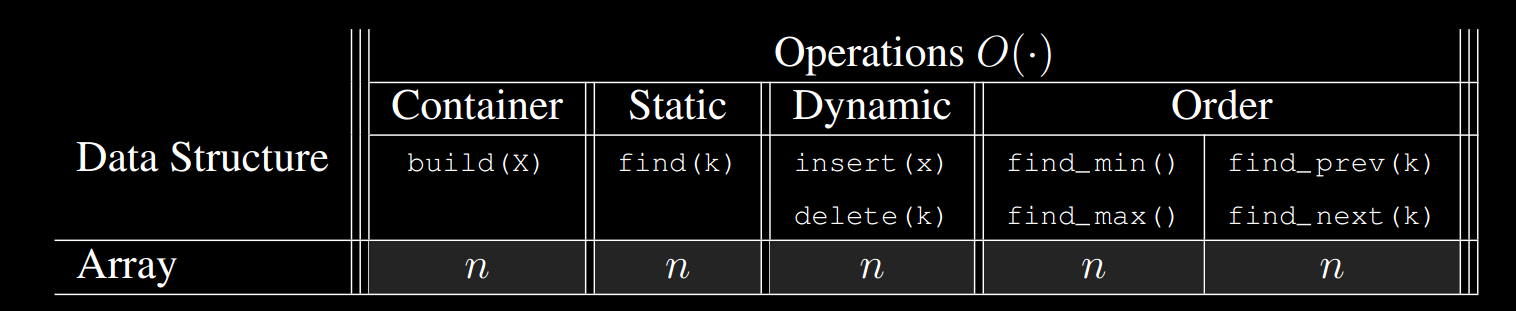

Using a sorted array:
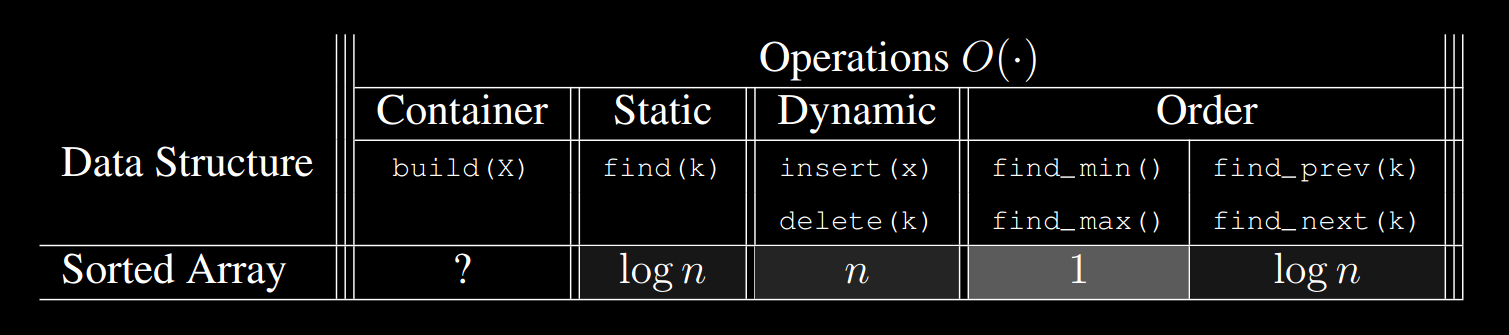

In [ ]:
class Sorted_Array_Set:
    def __init__(self): 
        self.A = Array_Seq() # O(1)
    def __len__(self): 
        return len(self.A) # O(1)
    def __iter__(self): 
        yield from self.A # O(n)
    def iter_order(self): 
        yield from self # O(n)
    
    def build(self, X): # O(?)
        self.A.build(X)
        self._sort()

    def _sort(self): # O(?)
        ??

    def _binary_search(self, key, i, j): # O(log n)
        if i >= j: 
            return i
        
        m = (i + j) // 2
        x = self.A.get_at(m)
        if x.key > key: 
            return self._binary_search(key, i, m - 1)
        if x.key < key: 
            return self._binary_search(key, m + 1, j)

        return m
    
    def find_min(self): # O(1)
        if len(self) > 0: 
            return self.A.get_at(0)
        else: 
            return None
    
    def find_max(self): # O(1)
        if len(self) > 0: 
            return self.A.get_at(len(self) - 1)
        else: 
            return None
    
    def find(self, k): # O(log n)
        if len(self) == 0: 
            return None
        i = self._binary_search(k, 0, len(self) - 1)
        x = self.A.get_at(i)
        if x.key == k: return x
        else: return None
    
    def find_next(self, k): # O(log n)
        if len(self) == 0: 
            return None
        i = self._binary_search(k, 0, len(self) - 1)
        x = self.A.get_at(i)
        if x.key > k: 
            return x
        if i + 1 < len(self): 
            return self.A.get_at(i + 1)
        else: 
            return None
    
    def find_prev(self, k): # O(log n)
        if len(self) == 0: return None
        i = self._binary_search(k, 0, len(self) - 1)
        x = self.A.get_at(i)
        if x.key < k: return x
        if i > 0: return self.A.get_at(i - 1)
        else: return None
    
    def insert(self, x): # O(n)
        if len(self.A) == 0:
            self.A.insert_first(x)
        else:
            i = self._binary_search(x.key, 0, len(self.A) - 1)
            k = self.A.get_at(i).key
        
        if k == x.key:
            self.A.set_at(i, x)
            return False
        
        if k > x.key: 
            self.A.insert_at(i, x)
        else: 
            self.A.insert_at(i + 1, x)
        
        return True
    
    def delete(self, k): # O(n)
        i = self._binary_search(k, 0, len(self.A) - 1)
        assert self.A.get_at(i).key == k, "Key does not exist in the set."
        return self.A.delete_at(i)
    
    def value_of(self, key):
        x=self.find(key)
        if x==None:
            return None
        return x.value
        

## Exercises
1- Implement the `__eq__` function (which overloads, or defines the `==` operator) for sets, implemented using ordinary arrays. It takes two arguments: `self`and the other set.  

2- Write a function that takes two sets (implemented as ordered arrays) and returns their difference, i.e. the set of elements which is in one but not in the other.  